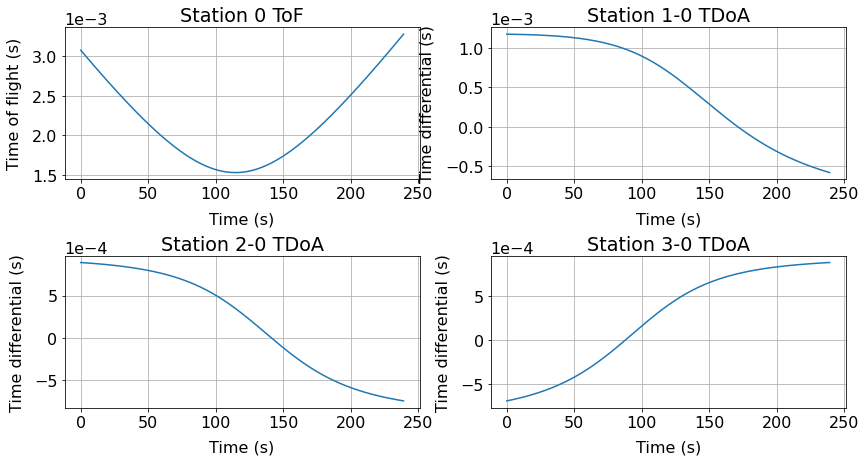

In [1]:
import time
import numpy as np
import argparse
import os

from astropy.time import Time   # Astropy 4.1rc1 is used

from orbitdeterminator.doppler.utils.utils import *
from orbitdeterminator.doppler.utils.utils_aux import *
from orbitdeterminator.doppler.utils.utils_vis import *

from scipy.optimize import fsolve

%matplotlib inline

np.random.seed(100)
np.set_printoptions(precision=4)

x_0, t_sec, x_sat, x_obs, _ = get_example_scenario(id=3, frame='teme')
tdoa, tof = get_tdoa_simulated(x_sat, x_obs)
r, rr = range_range_rate(x_sat, x_obs)

# fig_1 = plot_tdoa(tdoa, tof, t_sec, title="Reference station time of flight (ToF) and time differential of arrival (TDoA) for other stations")

fig_1 = plot_tdoa(tdoa, tof, t_sec)


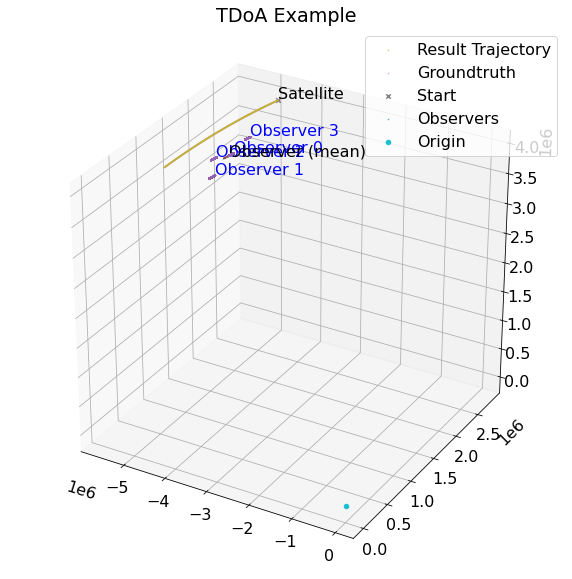

In [2]:
p_sat, tau = solve_tdoa(tdoa, x_obs)

fig_2 = plot_tdoa_results(p_sat, x_obs, x_sat)

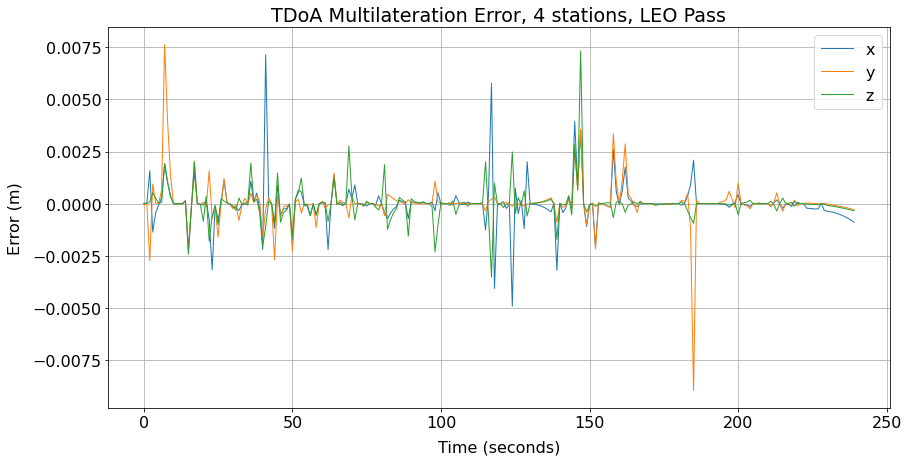

In [4]:
# fig_3 = plot_tdoa_errors(p_sat, x_sat, title = "TDoA Multilateration Error, 4 stations, LEO Pass")
fig_3 = plot_tdoa_errors(p_sat, x_sat)



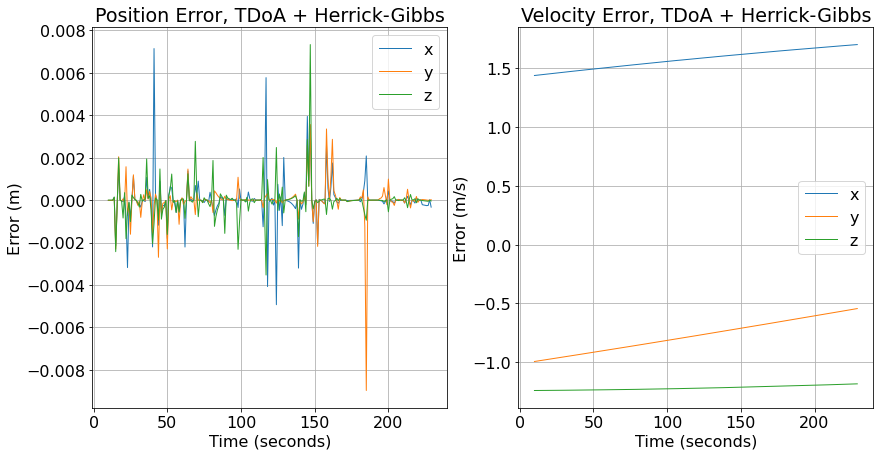

In [3]:
w = 10  # window size

x_sat_hg = np.zeros((x_sat.shape[0], x_sat.shape[1]-2*w))
error_hg = [None] * int(x_sat.shape[1]-w)

# Perform Herrick_Gibbs
for i in range(p_sat.shape[1]-2*w):
    idx = np.array([i, i+w, i+2*w])
    x_sat_hg[:,i], error_hg[i] = herrick_gibbs(p_sat[:, idx], t_sec[idx], angle_checks=True)

fig_4 = plot_tdoa_hg_errors(x_sat, t_sec, x_sat_hg, w=w)


